# Detecting acuro markers with Alphabot 2



## Alphabot 2 system

This notebook provides a simple guide to generating and detecting ArUco markers for the Alphabot 2. To ensure compatibility, we first review the system specifications of the Alphabot 2. By default, it comes with the following configuration:

- Mircoprocessor: Raspberry Pi 3 Model B+
- Architecture: armv7l
- System type: 32-bit
- Debian version: 11 (bullseye)
- Python version: 3.9.2

Due to the 32-bit system architecture, the latest version of OpenCV cannot be installed via the pip package manager. Instead, an older version of OpenCV must be installed using the Advanced Package Tool (apt). Therefore, the installed openCV version is **4.5.4**. This older version does support the Aruco module.

## Generating Aruco markers

Aruco markers can be used by the Aplhabot 2 for localisation. To this end, the aruco markers can either be attached to the robots and observed by a top-view mounted camera or placed on nearby walls for the robot's camera to detect. In both cases, the markers need to be generated first. This can be done by using the Aruco module from the OpenCV library. The Python script below handles Aruco marker generation. It requires the desired Aruco dictionary and marker ID that we want to generate. Although it is not included in this script, these generated markers can also be saved as a png for later use.

First we import the required python libraries:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Next we define the Aruco dictionaries and select which one we want to use:

In [2]:
ARUCO_DICT = {
  "DICT_4X4_50": cv2.aruco.DICT_4X4_50,
  "DICT_4X4_100": cv2.aruco.DICT_4X4_100,
  "DICT_4X4_250": cv2.aruco.DICT_4X4_250,
  "DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
  "DICT_5X5_50": cv2.aruco.DICT_5X5_50,
  "DICT_5X5_100": cv2.aruco.DICT_5X5_100,
  "DICT_5X5_250": cv2.aruco.DICT_5X5_250,
  "DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
  "DICT_6X6_50": cv2.aruco.DICT_6X6_50,
  "DICT_6X6_100": cv2.aruco.DICT_6X6_100,
  "DICT_6X6_250": cv2.aruco.DICT_6X6_250,
  "DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
  "DICT_7X7_50": cv2.aruco.DICT_7X7_50,
  "DICT_7X7_100": cv2.aruco.DICT_7X7_100,
  "DICT_7X7_250": cv2.aruco.DICT_7X7_250,
  "DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
  "DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL
}

# Select the dictionary we want to use
aruco_dict = cv2.aruco.getPredefinedDictionary(ARUCO_DICT["DICT_6X6_250"])

Then we generate a specific Aruco marker included in the dictionary:

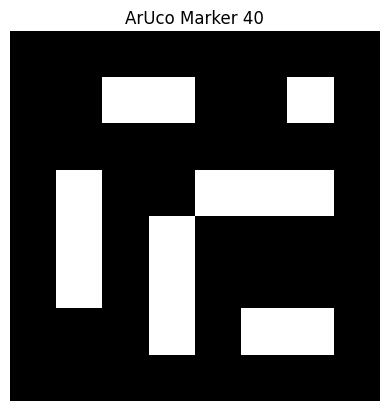

In [3]:
# Choose the marker id
marker_id = 40

# Generate the marker
marker_size = 200
marker_image = cv2.aruco.drawMarker(aruco_dict, marker_id, marker_size)

# Add a white border, otherwise the algorithm cannot detect it
border_color = (255, 255, 255) 
border_size = 10 

# Create a new image with the border
image = cv2.copyMakeBorder(marker_image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=border_color)

# Show the generated marker
plt.imshow(marker_image, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title(f'ArUco Marker {marker_id}')
plt.show()

## Detecting Acuro markers

To demonstrate Aruco marker detection, we use the Aruco module from the OpenCV library to detect the ID of the previously generated marker. The detected ID is printed as output. It can be verified that this is the same ID as the original.

In [4]:
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
parameters = cv2.aruco.DetectorParameters_create()

corners, ids, rejected = cv2.aruco.detectMarkers(image, aruco_dict, parameters=parameters)
print("Detected markers:", ids)

Detected markers: [[40]]
